In [1]:
import pandas as pd
from main import *
from helper import *
from solution import *

In [2]:
# Data locations
datapath = "../../../data/"
train_loc = datapath + "train.txt"
test_loc = datapath + "test.txt"

# Import data
train_df = load_data(train_loc)
test_df = load_data(test_loc)

In [3]:
print("Train dataset shape: ", train_df.shape)
print("Test dataset shape: ", test_df.shape)

Train dataset shape:  (1561, 257)
Test dataset shape:  (424, 257)


### Transform and Split Dataset Into Train and Test Sets

In [4]:
def get_X_y(df):
    observations_range = df[:].shape[0]

    label = []
    sys = []
    intense = []

    for i in range(observations_range):

        input_extract_features = df[:, 1:][i]
        sys_intense = extract_feature(input_extract_features)

        sys_temp = sys_intense[0]
        intense_temp = sys_intense[1]
        label_temp = df[:,0][i]

        sys.append(sys_temp)
        intense.append(intense_temp)
        label.append(label_temp)
        
        X = np.column_stack((sys, intense))
        y = np.array(label)

        # transform y labels
        y = np.where(y == 5, -1, 1)
        
    return X, y

In [5]:
X_train, y_train = get_X_y(train_df)
X_test, y_test = get_X_y(test_df)

In [6]:
X_train.shape

(1561, 2)

In [7]:
y_train.shape

(1561,)

In [8]:
y_train

array([-1,  1,  1, ...,  1,  1,  1])

### Build Perceptron Class

In [9]:
X_train[0:3]

array([[-0.53372656, -0.11173828],
       [-0.1174375 , -0.75391406],
       [-0.16229688, -0.77228125]])

In [10]:
np.zeros(X_train.shape[1] + 1)

array([0., 0., 0.])

In [11]:
class Perceptron(object):
    
    def __init__(self, max_iter):
        self.max_iter = max_iter

    def fit(self, X, y):
        """Train perceptron model on data (X,y).

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """
        ### YOUR CODE HERE
        
        # Define the max iterations
        max_iter = self.max_iter

        # Initialize Weights
        self.W = np.zeros(X.shape[1] + 1)
        
        # Loop through the number of iterations
        for _ in range(max_iter):
            # print(self.W)
            # print("")
            
            # Loop through the dataset
            for xi, target in zip(X, y):

                # Insert 1 to match with Wo
                xi = np.insert(xi, 0, 1, axis=0)

                # Compute predictions 
                prediction = np.dot(xi, self.W)

                # Apply Sign function to predictions
                prediction_sign = np.where(prediction >= .00, 1, -1)

                # print(xi, "--> Xi")
                # print(self.W, "--> Weights") 
                # print("Prediction: ", prediction, " prediction_sign: ", prediction_sign, " target: ", target)
                # print("")
                
                # Update weights
                self.W += (target - prediction_sign) * xi
        
        ### END YOUR CODE
        
        return self
    
    def get_params(self):
        """Get parameters for this perceptron model.

        Returns:
            W: An array of shape [n_features,].
        """
        if self.W is None:
            print("Run fit first!")
            sys.exit(-1)
        return self.W

    def predict(self, X):
        """Predict class labels for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds: An array of shape [n_samples,]. Only contains 1 or -1.
        """
        ### YOUR CODE HERE

        # Insert 1 as the first feature to match with Wo
        X = np.insert(X, 0, 1, axis=1)
        # print(X, " * ", self.W)

        # Compute predictions 
        prediction = np.dot(X, self.W)

        # Apply Sign function to predictions
        prediction_sign = np.where(prediction >= .00, 1, -1)

        return prediction_sign

        ### END YOUR CODE

    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            score: An float. Mean accuracy of self.predict(X) wrt. y.
        """
        ### YOUR CODE HERE

        # Predict the class labels for the samples in X
        predictions = self.predict(X)

        # Compare predictions with the actual labels and calculate accuracy
        accuracy = np.mean(predictions == y)
        
        return accuracy

        ### END YOUR CODE




def show_result(X, y, W,  save=True):
    """Plot the linear model after training. 
       You can call show_features with 'save' being False for convenience.

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.
        W: An array of shape [n_features,].
    
    Returns:
        Do not return any arguments. Save the plot to 'result.*' and include it
        in your report.
    """
    ### YOUR CODE HERE
    
    # Creating a scatter plot
    plt.figure(figsize=(8, 5))

    for i in range(len(X)):
        if y[i] == 1.0:
            plt.scatter(X[i, 0], X[i, 1], c='r', marker='*', label='Label 1' if (i==0 or i==1) else "")

        elif y[i] == -1.0:
            plt.scatter(X[i, 0], X[i, 1], c='b', marker='+', label='Label 5' if (i==0 or i==1) else "")


    # Plot the decision boundary
    x1_values = X[:,0]
    x2_values = - (W[1] / W[2]) * x1_values - (W[0] / W[2])
    plt.plot(x1_values, x2_values, label='Decision Boundary')

    # Set plot limits
    plt.xlim(min(X[:, 0]), max(X[:, 0]))
    plt.ylim(min(X[:, 1]), max(X[:, 1]))

    # Adding labels and title
    plt.xlabel('Sys')
    plt.ylabel('Intense')
    plt.title('Perceptron Results')
    plt.legend()
    
    if save == True:
        # Defined directory to save image output
        directory = "../output/images/"

        # Check if directory exists, if not, create it
        if not os.path.exists(directory):
            os.makedirs(directory)

        # Saving figure
        plt.savefig(f'{directory}model_results.png')
    else:
        pass
    
    plt.show()

    ### END YOUR CODE



def test_perceptron(max_iter, X_train, y_train, X_test, y_test):

    # train perceptron
    model = Perceptron(max_iter)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    W = model.get_params()

    # test perceptron model
    test_acc = model.score(X_test, y_test)

    return W, train_acc, test_acc

In [12]:
# Define Max Iterations
max_iter = 2

# Train model
model = Perceptron(max_iter)
model.fit(X_train, y_train)

# Get model parameters
W = model.get_params()
W

array([ 2.        , 15.48057812, -4.22282031])

In [13]:
# Compute predictions on X_test
y_pred = model.predict(X_test)
print(len(y_pred))
print(len(y_test))

424
424


In [14]:
# Evaluate the model's performance on the test data
accuracy = model.score(X_test, y_test)
print("Model Accuracy on Test Data:", accuracy)

Model Accuracy on Test Data: 0.9622641509433962


In [15]:
W, train_acc, test_acc = test_perceptron(max_iter, X_train, y_train, X_test, y_test)

print("Weights: ", W)
print("Tran Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)

Weights:  [ 2.         15.48057812 -4.22282031]
Tran Accuracy:  0.9801409352978859
Test Accuracy:  0.9622641509433962


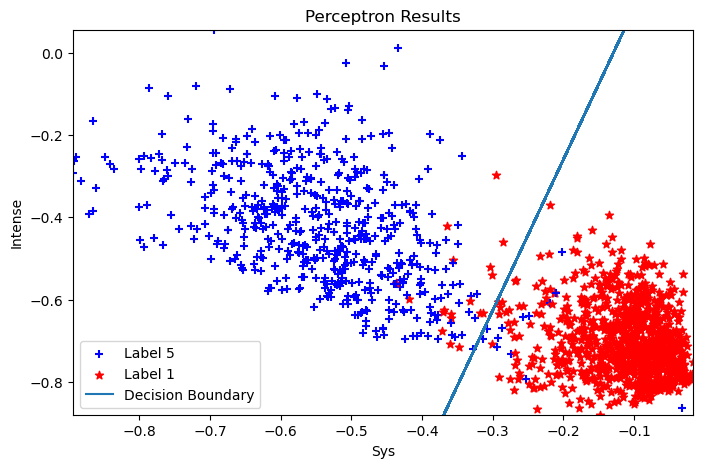

In [16]:
show_result(X_train, y_train, W, save=True)

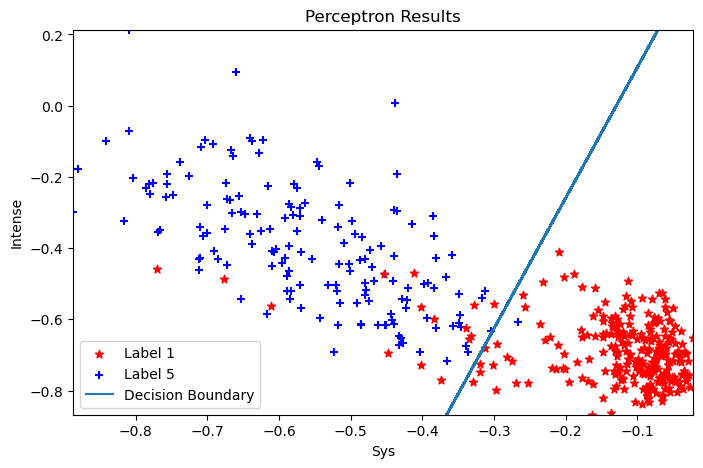

In [17]:
show_result(X_test, y_test, W, save=True)

In [18]:
test_accuracy(X_train, y_train, X_test, y_test)

Case 1: max iteration:10  train accuracy:0.981422  test accuracy: 0.959906.
Case 2: max iteration:30  train accuracy:0.975657  test accuracy: 0.945755.
Case 3: max iteration:50  train accuracy:0.976297  test accuracy: 0.948113.
Case 4: max iteration:100  train accuracy:0.975657  test accuracy: 0.945755.
Case 5: max iteration:200  train accuracy:0.975657  test accuracy: 0.945755.
Accuracy testing done.
